### topsis-灰色关联

In [1]:
import pandas as pd
df=pd.read_excel('./alldata.xlsx')
df.head()

,省份,year,a1,a2,a3,b1,b2,b3,c1,c2,c3,d1,d2,d3,d4,d5,e1,e2,e3,e4
0,北京,2012,6.497049,51.854531,16.242569,3012.0,24652.0,78.961051,0.001586,0.096458,0.646931,27.614317,19.200026,9.981554,0.357270,2.027766,25.750722,1.171099,8226,14051
1,北京,2013,6.234260,52.622000,15.787382,8428.0,31732.0,86.634100,0.001529,0.093227,0.491042,22.755799,15.597015,8.146616,0.312893,1.814722,27.311059,1.143967,10037,16402
2,北京,2014,7.071956,51.069954,15.365960,2957.0,62281.0,87.657199,0.001448,0.088823,0.441808,18.280913,11.453105,6.446577,0.289826,1.717384,26.605712,1.201162,9010,18721
3,北京,2015,7.258804,46.885658,13.958941,2702.0,66834.0,83.318310,0.001099,0.087619,0.431605,7.766631,6.380641,3.754662,0.205268,1.369800,23.205210,1.282915,7554,23749
4,北京,2016,7.249351,45.942073,13.444300,3235.0,94599.0,89.822848,0.001045,0.086087,0.386723,5.376977,2.093247,4.663183,0.166139,0.473938,23.299772,1.312705,7262,28290


In [2]:
import numpy as np
X=df.iloc[:,2:]
m, n = X.shape
##标准化
normalized_X = X.copy()
for col in range(n):
    if col==1 or (6 <= col <= 14):  # 假设数值小者为优
        normalized_X.iloc[:, col] = (np.max(X.iloc[:, col]) - X.iloc[:, col]) / (np.max(X.iloc[:, col]) - np.min(X.iloc[:, col]))
    else:  # 假设数值大者为优
        normalized_X.iloc[:, col] = (X.iloc[:, col] - np.min(X.iloc[:, col])) / (np.max(X.iloc[:, col]) - np.min(X.iloc[:, col]))
normalized_X

,a1,a2,a3,b1,b2,b3,c1,c2,c3,d1,d2,d3,d4,d5,e1,e2,e3,e4
0,0.309280,0.712487,0.141013,0.011362,0.019061,0.784633,0.936895,0.893629,0.903982,0.944727,0.960161,0.972159,0.988960,0.984658,0.689396,0.526774,0.050052,0.024250
1,0.299527,0.689914,0.130707,0.031894,0.024588,0.861747,0.940128,0.896059,0.927907,0.955047,0.967681,0.977427,0.990472,0.986278,0.669171,0.510266,0.061269,0.028357
2,0.330617,0.735562,0.121166,0.011153,0.048433,0.872029,0.944694,0.899373,0.935463,0.964552,0.976329,0.982307,0.991257,0.987019,0.678314,0.545064,0.054908,0.032408
3,0.337551,0.858628,0.089312,0.010186,0.051987,0.828423,0.964425,0.900279,0.937029,0.986887,0.986915,0.990036,0.994137,0.989663,0.722391,0.594805,0.045890,0.041192
4,0.337200,0.886380,0.077661,0.012207,0.073660,0.893794,0.967441,0.901432,0.943917,0.991963,0.995863,0.987427,0.995470,0.996477,0.721165,0.612929,0.044081,0.049125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.353648,0.486376,0.437573,0.054223,0.074108,0.494588,0.837046,0.504494,0.474390,0.884214,0.868829,0.691608,0.898050,0.954014,0.993311,0.078627,0.005797,0.005384
326,0.287493,0.463783,0.411162,0.016529,0.109777,0.524689,0.856859,0.495647,0.441768,0.900468,0.889807,0.668559,0.892880,0.955668,0.999379,0.051869,0.005723,0.005557
327,0.260155,0.454462,0.377472,0.016453,0.032340,0.426507,0.862318,0.461287,0.369774,0.917144,0.928925,0.671645,0.914626,0.977400,0.999393,0.021144,0.006671,0.007704
328,0.539330,0.559321,0.475297,0.016514,0.054079,0.411808,0.901365,0.562800,0.499197,0.938082,0.950695,0.760071,0.929878,0.985362,0.978141,0.027897,0.010115,0.009608


In [3]:
##计算熵权
sumzb = np.sum(normalized_X, axis=0)    # 计算第j项指标下，第i个样本占该指标的比重 Pij     
for j in range(n):
        normalized_X.iloc[:, j] = normalized_X.iloc[:, j] / sumzb[j]
a = normalized_X* 1.0                   # 对ln0处理
a = a.replace(0,0.0001)
e = (-1.0 / np.log(n)) * np.sum(normalized_X * np.log(a), axis=0)    # 计算每个指标的熵值
w = (1 - e) / np.sum(1 - e)      # 计算每个指标所占的权重
w

a1    0.058456
a2    0.058311
a3    0.058122
b1    0.047622
b2    0.049788
b3    0.058288
c1    0.058995
c2    0.059067
c3    0.058639
d1    0.059302
d2    0.059151
d3    0.058924
d4    0.059243
d5    0.059291
e1    0.058658
e2    0.054883
e3    0.043925
e4    0.039336
dtype: float64

In [41]:
# 加权标准化矩阵
Z = w * normalized_X

In [42]:
# 计算欧氏距离
positive_Z = np.max(Z, axis=0)  # 正理想解，每个指标的最大值
negative_Z = np.min(Z, axis=0)  # 负理想解，每个指标的最小值
distance_positive = np.sqrt(np.sum((Z - positive_Z) ** 2, axis=1))  # 正理想解的欧氏距离
distance_negative = np.sqrt(np.sum((Z - negative_Z) ** 2, axis=1))  # 负理想解的欧氏距离

# 计算灰色关联度
abs_positive = np.abs(positive_Z - Z)
abs_negative = np.abs(negative_Z - Z)
R = 0.5  # 分辨系数
a_positive = (np.min(abs_positive) + R * np.max(abs_positive)) / (abs_positive + R * np.max(abs_positive))  # 正灰色关联系数矩阵
a_negative = (np.min(abs_negative) + R * np.max(abs_negative)) / (abs_negative + R * np.max(abs_negative))  # 负灰色关联系数矩阵

r_positive = np.sum(a_positive, axis=1) / n  # 正灰色关联度
r_negative = np.sum(a_negative, axis=1) / n  # 负灰色关联度


In [43]:
# 无量纲处理
R_positive = r_positive / np.max(r_positive)
R_negative = r_negative / np.max(r_negative)
D_positive = distance_positive / np.max(distance_positive)
D_negative = distance_negative / np.max(distance_negative)

In [44]:
# 设置偏好程度
a1 = 0.8
a2 = 1 - a1
T_positive = a1 * D_negative + a2 * R_positive
T_negative = a1 * D_positive + a2 * R_negative

In [45]:
# 计算相对贴近度
S_positive = T_positive / (T_positive + T_negative)
S_positive

0      0.301716
1      0.304388
2      0.308141
3      0.313153
4      0.317791
         ...   
325    0.278301
326    0.276492
327    0.268506
328    0.288350
329    0.296800
Length: 330, dtype: float64

In [46]:
results = pd.DataFrame({
    '省份': df['省份'],
    '年份': df['year'],
    '相对贴近度': S_positive
})
results
results['排名'] = results.groupby('年份')['相对贴近度'].rank(ascending=False)
results

,省份,年份,相对贴近度,排名
0,北京,2012,0.301716,13.0
1,北京,2013,0.304388,16.0
2,北京,2014,0.308141,14.0
3,北京,2015,0.313153,10.0
4,北京,2016,0.317791,9.0
...,...,...,...,...
325,新疆,2018,0.278301,25.0
326,新疆,2019,0.276492,27.0
327,新疆,2020,0.268506,29.0
328,新疆,2021,0.288350,24.0


In [47]:
#计算每个省份这些年的平均相对贴近度
province_mean = results.groupby('省份')['相对贴近度'].mean().reset_index()
province_mean.columns = ['省份', '平均相对贴近度']

# 按照平均相对贴近度进行排名
province_mean['排名'] = province_mean['平均相对贴近度'].rank(ascending=False)
province_mean = province_mean.sort_values(by='排名')
province_mean

,省份,平均相对贴近度,排名
11,广东,0.486774,1.0
14,江苏,0.441779,2.0
9,山东,0.427642,3.0
18,浙江,0.412452,4.0
23,福建,0.333582,5.0
0,上海,0.332748,6.0
17,河南,0.327593,7.0
21,湖南,0.326399,8.0
8,安徽,0.324450,9.0
16,河北,0.323343,10.0


In [64]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 定义区域划分
regions = {
    '东部': ['北京', '天津', '河北', '上海', '江苏', '浙江', '福建', '山东', '广东', '海南'],
    '中部': ['山西', '安徽', '江西', '河南', '湖北', '湖南'],
    '西部': ['内蒙古', '广西', '重庆', '四川', '贵州', '云南', '陕西', '甘肃', '青海', '宁夏', '新疆'],
    '东北': ['辽宁', '吉林', '黑龙江']
}

# 将每个省份分配到相应的区域
def assign_region(province):
    for region, provinces in regions.items():
        if province in provinces:
            return region
    return '其他'  # 默认返回'其他'，不过这个情况应该不会发生

results['区域'] = results['省份'].apply(assign_region)

results

,省份,年份,相对贴近度,排名,区域
0,北京,2012,0.301716,13,东部
1,北京,2013,0.304388,16,东部
2,北京,2014,0.308141,14,东部
3,北京,2015,0.313153,10,东部
4,北京,2016,0.317791,9,东部
...,...,...,...,...,...
325,新疆,2018,0.278301,25,西部
326,新疆,2019,0.276492,27,西部
327,新疆,2020,0.268506,29,西部
328,新疆,2021,0.288350,24,西部


In [49]:
results.to_excel('面板数据格式结果.xlsx', index=False)

<ipython-input-49-d3dc2fc9395c>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  results.to_excel('面板数据格式结果.xlsx', index=False)


In [50]:
pivot_df = results.pivot_table(index="省份", columns="年份", values="相对贴近度",sort=False).reset_index()
pivot_df.to_excel('马尔科夫链计算数据格式.xlsx', index=False)

<ipython-input-50-bdec3de733e6>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pivot_df.to_excel('马尔科夫链计算数据格式.xlsx', index=False)


In [52]:
# 计算每个区域和全国的相对贴近度年平均值
region_mean = results.groupby(['年份', '区域'])['相对贴近度'].mean().reset_index()
national_mean = results.groupby('年份')['相对贴近度'].mean().reset_index()
national_mean['区域'] = '全国'

# 合并区域和全国的平均值
combined_mean = pd.concat([region_mean, national_mean], ignore_index=True)

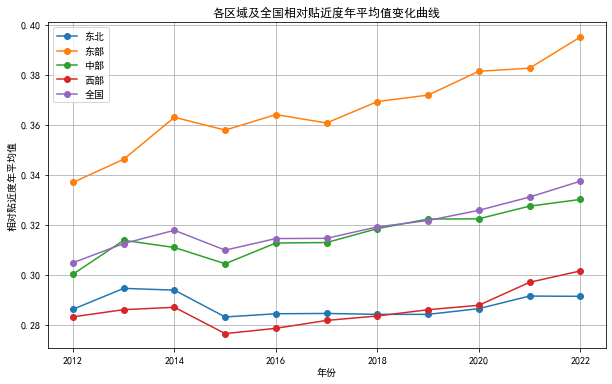

In [53]:
plt.figure(figsize=(10, 6))
for region in combined_mean['区域'].unique():
    region_data = combined_mean[combined_mean['区域'] == region]
    plt.plot(region_data['年份'], region_data['相对贴近度'], marker='o', label=region)

plt.title('各区域及全国相对贴近度年平均值变化曲线')
plt.xlabel('年份')
plt.ylabel('相对贴近度年平均值')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# 输出为Excel文件
combined_mean.to_excel('region_national_mean.xlsx', index=False)

<ipython-input-54-23f6495cd92e>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  combined_mean.to_excel('region_national_mean.xlsx', index=False)


### 核密度估计

In [55]:
import pandas as pd
results=pd.read_excel('./面板数据格式结果.xlsx')
results.head()

,省份,年份,相对贴近度,排名,区域
0,北京,2012,0.301716,13,东部
1,北京,2013,0.304388,16,东部
2,北京,2014,0.308141,14,东部
3,北京,2015,0.313153,10,东部
4,北京,2016,0.317791,9,东部


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut,KFold
from sklearn.neighbors import KernelDensity

In [57]:
#交叉验证法确定带宽
df_2013 = results[results['年份'] == 2013]['相对贴近度'].values.reshape(-1, 1)
bandwidths = 10**np.linspace(-2,2,100)
kfold = KFold(n_splits=10)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                   {'bandwidth':bandwidths},
                    cv=kfold)
grid.fit(df_2013)

best_KDEbandwidth = grid.best_params_['bandwidth']
best_KDEbandwidth
#直接计算
best_width=1.05*np.std(df_2013)*(len(df_2013)**(-1/5))
best_width

0.021685486115137913

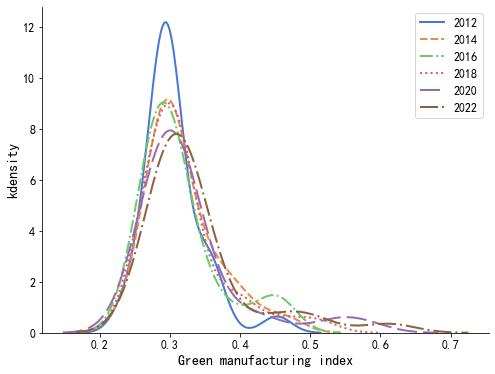

In [61]:
years = [2012, 2014, 2016, 2018,2020, 2022]

plt.figure(figsize=(8, 6))
palette = sns.color_palette("muted", len(years))
line_styles = ['-', '--', '-.', ':', (0, (10, 3)), (0, (9, 2, 1, 2))]
for i, year in enumerate(years):
    df_region_year = results[(results['年份'] == year)]['相对贴近度'].values
    if df_region_year.size > 0: 
        sns.kdeplot(df_region_year, bw_method='scott', label=f'{year}', linestyle=line_styles[i % len(line_styles)], color=palette[i], linewidth=2)
plt.ylabel("kdensity",fontsize=14)
plt.xlabel("Green manufacturing index",fontsize=14)      
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig('全国_核密度估计图.png')
plt.show()

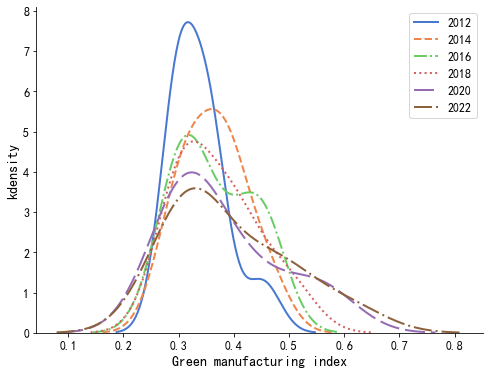

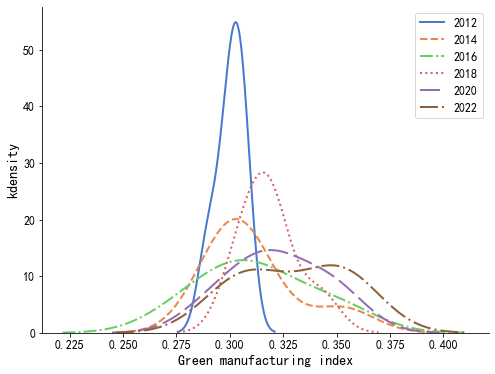

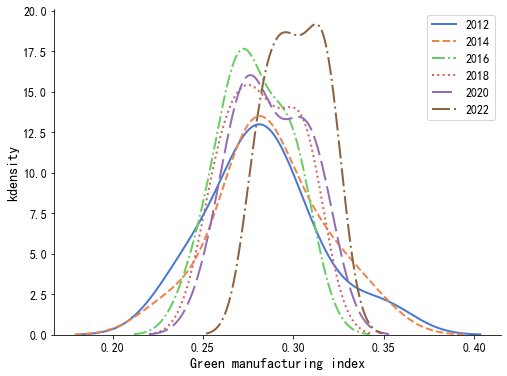

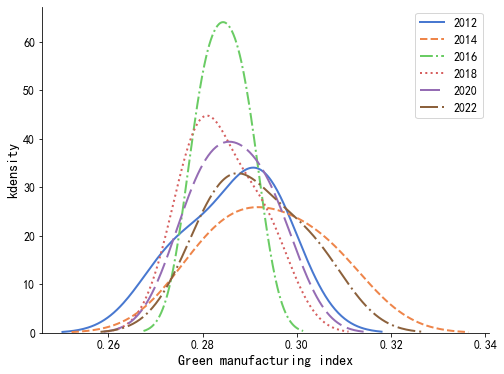

In [63]:
regions = results['区域'].unique()
years = [2012, 2014, 2016, 2018,2020, 2022]

palette = sns.color_palette("muted", len(years))
line_styles = ['-', '--', '-.', ':', (0, (10, 3)), (0, (9, 2, 1, 2))]
for region in regions:
    plt.figure(figsize=(8, 6))
    for i, year in enumerate(years):
        df_region_year = results[(results['区域'] == region) & (results['年份'] == year)]['相对贴近度'].values
        if df_region_year.size > 0:  # Ensure the dataset is not empty
            sns.kdeplot(df_region_year, bw_method='scott', label=f'{year}', linestyle=line_styles[i % len(line_styles)], color=palette[i], linewidth=2)
    plt.ylabel("kdensity",fontsize=14)
    plt.xlabel("Green manufacturing index",fontsize=14)      
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    filename = f'{region}_核密度估计图.png'
    plt.savefig(filename)
    plt.show()

In [28]:
regions

array(['东部', '中部', '西部', '东北'], dtype=object)